 # Study on the Barcelona Airbnb dataset 

In [19]:
#imports (pandas, matplotlib, seaborn)
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

### Get the csv data: 

In [20]:
data = pd.read_csv('barcelona_listings.csv')
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11048\3084663194.py:1: DtypeWarning: Columns (44,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('barcelona_listings.csv')


,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,18666,https://www.airbnb.com/rooms/18666,20190710134514,2019-07-10,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",none,...,f,f,flexible,f,f,31,31,0,0,0.02
1,1,18674,https://www.airbnb.com/rooms/18674,20190710134514,2019-07-10,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,none,...,t,f,strict_14_with_grace_period,f,f,31,31,0,0,0.20
2,2,21605,https://www.airbnb.com/rooms/21605,20190710134514,2019-07-10,Nice and sunny duble room,"The flat is in Poblenou district, and the room...","L'apartament està al barri de Poblenou, i l'ha...","The flat is in Poblenou district, and the room...",none,...,f,f,moderate,f,f,2,0,2,0,3.08
3,3,23197,https://www.airbnb.com/rooms/23197,20190710134514,2019-07-10,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,none,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,0.44
4,4,25786,https://www.airbnb.com/rooms/25786,20190710134514,2019-07-10,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Room available for rent.- PEDRO PEREZ. Share...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,none,...,t,f,strict_14_with_grace_period,t,t,1,0,1,0,2.22


#### Get only the columns we need (select a subset of the dataset )


In [21]:
data_bcn = data[["id", "listing_url", "name", "summary", "space", "description", "city", "latitude", "longitude", "room_type", "price", "weekly_price", "number_of_reviews", "reviews_per_month"]]
data_bcn.head()

,id,listing_url,name,summary,space,description,city,latitude,longitude,room_type,price,weekly_price,number_of_reviews,reviews_per_month
0,18666,https://www.airbnb.com/rooms/18666,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",Barcelona,41.40889,2.18555,Entire home/apt,$130.00,NaN,1,0.02
1,18674,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,Barcelona,41.40420,2.17306,Entire home/apt,$60.00,NaN,15,0.20
2,21605,https://www.airbnb.com/rooms/21605,Nice and sunny duble room,"The flat is in Poblenou district, and the room...","L'apartament està al barri de Poblenou, i l'ha...","The flat is in Poblenou district, and the room...",Barcelona,41.40560,2.19821,Private room,$33.00,NaN,119,3.08
3,23197,https://www.airbnb.com/rooms/23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,Sant Adria de Besos,41.41203,2.22114,Entire home/apt,$210.00,NaN,45,0.44
4,25786,https://www.airbnb.com/rooms/25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Room available for rent.- PEDRO PEREZ. Share...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Barcelona,41.40145,2.15645,Private room,$45.00,NaN,241,2.22


In [22]:
# get the data shape (rows and columns)
data_bcn.shape

(19833, 14)

In [23]:
#data types
data_bcn.dtypes

id                     int64
listing_url           object
name                  object
summary               object
space                 object
description           object
city                  object
latitude             float64
longitude            float64
room_type             object
price                 object
weekly_price          object
number_of_reviews      int64
reviews_per_month    float64
dtype: object

## Data cleaning :

#### spot the missing values 

In [24]:

data_bcn.isna().sum()

id                       0
listing_url              0
name                    17
summary               1010
space                 5234
description            361
city                     4
latitude                 0
longitude                0
room_type                0
price                    0
weekly_price         18526
number_of_reviews        0
reviews_per_month     4618
dtype: int64

#### fill the missing values with defaults 

In [25]:

 #no reviews per month --> 0
data_bcn.fillna({'reviews_per_month': 0}, inplace=True)
 #no name -> 'airbnb in barcelona'
data_bcn.fillna({'name': "airbnb in barcelona"}, inplace=True)

#summary , space and descriptions will be filled with empty strings 
data_bcn.fillna({'summary' : ""}, inplace=True)

data_bcn.fillna({'space' : ""}, inplace= True)

data_bcn.fillna({'description' : ""}, inplace = True)

data_bcn.fillna({'city' : "BCN"}, inplace= True)





C:\Users\user\AppData\Local\Temp\ipykernel_11048\3549775755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bcn.fillna({'reviews_per_month': 0}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11048\3549775755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bcn.fillna({'name': "airbnb in barcelona"}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11048\3549775755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [26]:
data_bcn.isna().sum()


id                       0
listing_url              0
name                     0
summary                  0
space                    0
description              0
city                     0
latitude                 0
longitude                0
room_type                0
price                    0
weekly_price         18526
number_of_reviews        0
reviews_per_month        0
dtype: int64

In [27]:
#we wont need weekly_price and its filled with missing values much so we will drop the column
del data_bcn["weekly_price"]

In [28]:
data_bcn.isna().sum()

id                   0
listing_url          0
name                 0
summary              0
space                0
description          0
city                 0
latitude             0
longitude            0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
dtype: int64

#### we got rid of the missing values 

In [29]:
data_bcn.price.head()

0    $130.00
1     $60.00
2     $33.00
3    $210.00
4     $45.00
Name: price, dtype: object

#### we notice that the price is a string object starting with a $
#### lets parse it to float in order to use arithmetic comparison

In [54]:
prices = data_bcn["price"]

pricesTab = []
for price in prices:
    pricesTab.append(price[1:])


print(pricesTab[1:10])





['60.00', '33.00', '210.00', '45.00', '42.00', '53.00', '75.00', '85.00', '30.00']


In [58]:
for price in pricesTab :
    if(len(price) > 6):
        print(price)
        break
 
    

1,000.00


#### solve the thousands problem (remove the comma )

In [32]:
for price in pricesTab :
    if(len(price) > 6):
        pricesTab[pricesTab.index(price)]= price.split(',')[0] + '000.00'
        




In [33]:
#change pricetab values to floats 
for price in pricesTab:
    #change to floats 
    pricesTab[pricesTab.index(price)] = float(price)

In [34]:
pricesTab[1:10]

[60.0, 33.0, 210.0, 45.0, 42.0, 53.0, 75.0, 85.0, 30.0]

#### turn pricestab into a dataframe 

In [35]:
cleanPricesData = {
    "prices" : pricesTab
}

cleanPrices = pd.DataFrame(cleanPricesData)


In [36]:
cleanPrices.head()

,prices
0,130.0
1,60.0
2,33.0
3,210.0
4,45.0


In [37]:
#change the prices column in our initial dataset 

#display the 2 dfs 
display(data_bcn.head(), cleanPrices)

,id,listing_url,name,summary,space,description,city,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,18666,https://www.airbnb.com/rooms/18666,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",Barcelona,41.40889,2.18555,Entire home/apt,$130.00,1,0.02
1,18674,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,Barcelona,41.40420,2.17306,Entire home/apt,$60.00,15,0.20
2,21605,https://www.airbnb.com/rooms/21605,Nice and sunny duble room,"The flat is in Poblenou district, and the room...","L'apartament està al barri de Poblenou, i l'ha...","The flat is in Poblenou district, and the room...",Barcelona,41.40560,2.19821,Private room,$33.00,119,3.08
3,23197,https://www.airbnb.com/rooms/23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,Sant Adria de Besos,41.41203,2.22114,Entire home/apt,$210.00,45,0.44
4,25786,https://www.airbnb.com/rooms/25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Room available for rent.- PEDRO PEREZ. Share...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Barcelona,41.40145,2.15645,Private room,$45.00,241,2.22


,prices
0,130.0
1,60.0
2,33.0
3,210.0
4,45.0
...,...
19828,16.0
19829,30.0
19830,55.0
19831,125.0


#### new dataframe after prices cleaned 

In [38]:

data_bcn_bis = pd.concat([data_bcn, cleanPrices], axis=1)


In [39]:
data_bcn_bis.head()

,id,listing_url,name,summary,space,description,city,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,prices
0,18666,https://www.airbnb.com/rooms/18666,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",Barcelona,41.40889,2.18555,Entire home/apt,$130.00,1,0.02,130.0
1,18674,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,Barcelona,41.40420,2.17306,Entire home/apt,$60.00,15,0.20,60.0
2,21605,https://www.airbnb.com/rooms/21605,Nice and sunny duble room,"The flat is in Poblenou district, and the room...","L'apartament està al barri de Poblenou, i l'ha...","The flat is in Poblenou district, and the room...",Barcelona,41.40560,2.19821,Private room,$33.00,119,3.08,33.0
3,23197,https://www.airbnb.com/rooms/23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,Sant Adria de Besos,41.41203,2.22114,Entire home/apt,$210.00,45,0.44,210.0
4,25786,https://www.airbnb.com/rooms/25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Room available for rent.- PEDRO PEREZ. Share...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Barcelona,41.40145,2.15645,Private room,$45.00,241,2.22,45.0


#### now lets remove the old price column 

In [40]:
del data_bcn_bis["price"]

#### now we have a clean dataset 

In [41]:
data_bcn_bis.head()

,id,listing_url,name,summary,space,description,city,latitude,longitude,room_type,number_of_reviews,reviews_per_month,prices
0,18666,https://www.airbnb.com/rooms/18666,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",Barcelona,41.40889,2.18555,Entire home/apt,1,0.02,130.0
1,18674,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,Barcelona,41.40420,2.17306,Entire home/apt,15,0.20,60.0
2,21605,https://www.airbnb.com/rooms/21605,Nice and sunny duble room,"The flat is in Poblenou district, and the room...","L'apartament està al barri de Poblenou, i l'ha...","The flat is in Poblenou district, and the room...",Barcelona,41.40560,2.19821,Private room,119,3.08,33.0
3,23197,https://www.airbnb.com/rooms/23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,Sant Adria de Besos,41.41203,2.22114,Entire home/apt,45,0.44,210.0
4,25786,https://www.airbnb.com/rooms/25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Room available for rent.- PEDRO PEREZ. Share...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Barcelona,41.40145,2.15645,Private room,241,2.22,45.0


## Start the analysis 

## Goal: see the appartments i can rent for my holiday 

#### lets find the appartments i can rent this summer in Barcelona 
#### my max budget is 60 euros per night 

In [42]:
#boolean masking
affordable = data_bcn_bis["prices"] < 60
affordable

0        False
1        False
2         True
3        False
4         True
         ...  
19828     True
19829     True
19830     True
19831    False
19832    False
Name: prices, Length: 19833, dtype: bool

#### the appartments i can rent

In [43]:
inmyBudget = data_bcn_bis[affordable]
inmyBudget[["listing_url", "name", "summary", "prices"]]

,listing_url,name,summary,prices
2,https://www.airbnb.com/rooms/21605,Nice and sunny duble room,"The flat is in Poblenou district, and the room...",33.0
4,https://www.airbnb.com/rooms/25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,45.0
5,https://www.airbnb.com/rooms/31377,"Room for 2, Sagrada Famili",The room in 500 m from Sagrada Familia. 3 bran...,42.0
6,https://www.airbnb.com/rooms/31380,"Room for 2-3. Barcelona, Sagrada Famili","Room for 2-3. Great location, right next to S...",53.0
9,https://www.airbnb.com/rooms/32615,"Sunny room, top floor with 2 terraces!","Cozy apartment in a quiet area, with 2 fantast...",30.0
...,...,...,...,...
19826,https://www.airbnb.com/rooms/36573621,Chambre double (Apt avec terrasse centre ville),L'appartement est situé dans le haut du Raval ...,29.0
19827,https://www.airbnb.com/rooms/36575263,Confort en el corazón de Barcelona,Piso compartido con dos amigos encantadores! E...,30.0
19828,https://www.airbnb.com/rooms/36575390,"Habitación privada, n° 1bis, Barcelona.",,16.0
19829,https://www.airbnb.com/rooms/36579000,Sunny room for two close to beach,Sunny room for two close to beach,30.0


#### disribution of airbnb prices accross bcn using seaborn

Text(0.5, 0.98, 'Distribution of prices of my rentable Airbnbs in BCN')

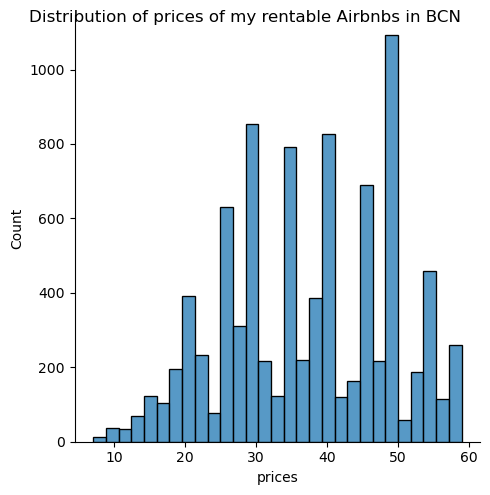

In [44]:
prices_distrib_inmyBudget = sns.displot(data = inmyBudget, x = 'prices')
prices_distrib_inmyBudget.fig.suptitle('Distribution of prices of my rentable Airbnbs in BCN')

## Stats:

#### mean price of the airbnbs in barcelona 


In [45]:
mean_price = data_bcn_bis["prices"].mean()
print('an airbnb in barcelona costs on average : ' + str(mean_price) + '$')



an airbnb in barcelona costs on average : 129.0787576261786$


#### lets see how much is the spread around the mean price in BCN 


In [46]:
spread_price = data_bcn_bis["prices"].std()
print('the spread of the prices of the airbnbs in BCN around the mean is ' + str(spread_price) + '$')



the spread of the prices of the airbnbs in BCN around the mean is 421.9845040889969$


#### this is too high for me! lets study airbnbs i can afford 


In [47]:
mean_price_inmyBudget = inmyBudget["prices"].mean()

spread_price_inmyBudget = inmyBudget["prices"].std()

print('an airbnb i can afford in barcelona costs on average : ' + str(mean_price_inmyBudget) + '$')

print('the spread of the prices of the airbnbs i can afford in BCN around the mean is ' + str(spread_price_inmyBudget) + '$')






an airbnb i can afford in barcelona costs on average : 37.352450816938976$
the spread of the prices of the airbnbs i can afford in BCN around the mean is 11.777842892446118$


## Visualize my rentable airbnbs: 

#### Where are my rentable airbnbs located ? 

In [48]:
inmyBudget.plot(title = 'Airbnb prices across barcelona' , kind = "scatter", x = "longitude", y = "latitude", xticks=[], yticks=[], figsize=(12,8),
                           c = "prices",
                           cmap = "inferno",
                           alpha = 0.9,
                           colorbar=True)

<AxesSubplot:title={'center':'Airbnb prices across barcelona'}, xlabel='longitude', ylabel='latitude'>

#### lets plot that on a barcelona map to see it better 


In [49]:
background_image = plt.imread('mapa_bcn.png')
#show the map with a gray color 
plt.imshow(background_image, zorder=0, extent=[2.05, 2.24, 41.30, 41.50], cmap = "gray")

#?
ax = plt.gca()

#plot the point (dont forget the ax)
inmyBudget.plot(title="Appartments i can rent in Barcelona", 
                            kind = "scatter", 
                            ax=ax,
                            ylim=[41.30, 41.50], 
                            xlim=[2.05, 2.24],
                            x = "longitude",
                            y = "latitude",
                            figsize = (12,8),
                            c = "prices",
                            cmap = "inferno",
                            alpha = 0.9,
                            colorbar = True
                        )

<AxesSubplot:title={'center':'Appartments i can rent in Barcelona'}, xlabel='longitude', ylabel='latitude'>

#### Now i have an idea of the money i need for my next holidays !

### End 